## Project Overview

Using what you've learned; download the NYC Property Sales Dataset from Kaggle. This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.


This dataset contains:

- BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).

- BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.

- BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time.


Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

• Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.

• This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you"re able to make decisions using data in a scientific manner. 

the questions is:

- Berapa nilai rata-rata (mean) dari harga dan jumlah penjualan properti di masing-masing borough?
- Berapakah nilai tengah dari harga penjualan di setiap Borought?
- Pada tahun berapa pembangunan di NYC banyak dilakukan?
- Berapakah umur bangunan yang diperjual belikan?
- Berapa nilai probabilitasnya selama penjualan?
- Berapa nilai Interval kepercayaan 95% (z =1.96) untuk rata rata harga penjualan?
- Apakah mean harga penjualan properti antara Manhattan dan Bronx sama?



## NYC Property Sales : Simple Exploratory Data Analysis (EDA)

#### Import Library
Untuk memulai pengerjaan kita akan mengimport semua library yang dibutuhkan.


In [346]:
# import library dan analisis data
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import wordcloud
from wordcloud import WordCloud
from scipy import stats
from IPython.display import display, Image
from collections import Counter
from tabulate import tabulate
from statistics import mode

#### Load Dataset 
Upload dataset yang telah di download dari kaggel dengan format csv


In [347]:
# import data --> london crime
data_df = pd.read_csv("NYC/nyc_rolling_sales.csv")
data_df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [348]:
# mengubah nama digit kode pada borought menjadi lokasi
data_df["BOROUGH"] = data_df.BOROUGH.replace({1: "Manhattan", 2: "Bronx", 3: "Brooklyn", 4: "Queens", 5: "Staten Islands"})

# menampilkan lima baris pertama dari DataFrame
data_df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


#### Identify the shape of the dataset

In [349]:
data_df.shape # bentuk dimensi dataset yang menerangkan jumlah 84548 data dan 22 kategori

(84548, 22)

#### Identify data type each column

In [350]:
data_df.dtypes # type data tiap kolom

Unnamed: 0                         int64
BOROUGH                           object
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

In [351]:
data_df.info() # memberikan ringkasan tentang dataset, termasuk jumlah data, tipe data kolom, dan penggunaan memori.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  object
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

#### Identify missing value

In [352]:
# constructing the numerical variables:
numeric = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "LAND SQUARE FEET" , "GROSS SQUARE FEET","SALE PRICE" ]

for col in numeric: 
    data_df[col] = pd.to_numeric(data_df[col], errors="coerce") # coercing errors to NAs

In [353]:
data_df.isna().sum() # mendeteksi keberadaan nilai kosong


Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [354]:
data_df.replace(" ",np.nan, inplace=True)
# menunjukkan persentase nilai yang hilang (missing values) untuk setiap kolom.
data_df.isna().sum() /len(data_df) *100

Unnamed: 0                          0.000000
BOROUGH                             0.000000
NEIGHBORHOOD                        0.000000
BUILDING CLASS CATEGORY             0.000000
TAX CLASS AT PRESENT                0.872877
BLOCK                               0.000000
LOT                                 0.000000
EASE-MENT                         100.000000
BUILDING CLASS AT PRESENT           0.872877
ADDRESS                             0.000000
APARTMENT NUMBER                   77.466055
ZIP CODE                            0.000000
RESIDENTIAL UNITS                   0.000000
COMMERCIAL UNITS                    0.000000
TOTAL UNITS                         0.000000
LAND SQUARE FEET                   31.049818
GROSS SQUARE FEET                  32.658372
YEAR BUILT                          0.000000
TAX CLASS AT TIME OF SALE           0.000000
BUILDING CLASS AT TIME OF SALE      0.000000
SALE PRICE                         17.222170
SALE DATE                           0.000000
dtype: flo

SUM: 
- EASE-MENT: Memiliki 100% nilai hilang. Berarti seluruh data pada kolom ini hilang dan kolom ini mungkin tidak memberikan informasi yang berguna.
- APARTMENT NUMBER: Memiliki sekitar 77.47% nilai hilang. Data di kolom ini juga memiliki sejumlah besar nilai hilang.
- LAND SQUARE FEET dan GROSS SQUARE FEET: Kedua kolom ini memiliki sekitar 31.05% dan 32.66% nilai hilang, masing-masing. Meskipun tidak seburuk EASE-MENT dan APARTMENT NUMBER, masih terdapat cukup banyak data yang hilang

In [355]:
# Menghapus dua kolom, yaitu "EASE-MENT" dan "APARTMENT NUMBER", dari DataFrame 
data_df.drop(["EASE-MENT","APARTMENT NUMBER"], axis=1, inplace=True)

In [356]:
# Menghitung jumlah nilai null di setiap kolom DataFrame dan mengembalikan hasilnya dalam bentuk Series yang menunjukkan jumlah nilai null di setiap kolom.
data_df.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [357]:
# Mengisi nilai-nilai yang hilang (NaN) dalam kolom "LAND SQUARE FEET" dengan nilai rata-rata dari kolom tersebut.
data_df["LAND SQUARE FEET"].fillna(data_df["LAND SQUARE FEET"].mean(), inplace=True)

# Mengisi nilai-nilai yang hilang (NaN) dalam kolom "GROSS SQUARE FEET" dengan nilai rata-rata dari kolom tersebut. 
data_df["GROSS SQUARE FEET"].fillna(data_df["GROSS SQUARE FEET"].mean(), inplace=True)


In [358]:
# Menghitung jumlah nilai null di setiap kolom DataFrame dan mengembalikan hasilnya dalam bentuk Series yang  menunjukkan jumlah nilai null di setiap kolom.
data_df.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [359]:
# Menghapus semua baris yang mengandung nilai-nilai yang hilang (NaN) dari DataFrame 
data_df = data_df.dropna()

# Mengembalikan semua nilai nol, menunjukkan bahwa tidak ada lagi nilai-nilai yang hilang dalam DataFrame.
data_df.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

#### Describe the dataset

In [360]:
data_df.describe () # untuk menghasilkan ringkasan statistik

,Unnamed: 0,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,69314.000000,69314.000000,69314.000000,69314.000000,69314.000000,69314.000000,69314.000000,6.931400e+04,6.931400e+04,69314.000000,69314.00000,6.931400e+04
mean,10268.224428,4203.171408,365.158280,10799.673457,1.917996,0.174164,2.112517,3.741839e+03,3.806508e+03,1816.762602,1.63625,1.266720e+06
std,7088.282386,3432.199652,652.240313,986.906946,14.618799,9.167888,17.358533,3.386196e+04,2.459076e+04,492.248274,0.76927,1.141836e+07
min,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.00000,0.000000e+00
25%,4178.000000,1350.000000,21.000000,10307.000000,0.000000,0.000000,1.000000,1.900000e+03,1.280000e+03,1920.000000,1.00000,2.250000e+05
50%,8960.500000,3389.000000,49.000000,11209.000000,1.000000,0.000000,1.000000,2.950000e+03,2.400000e+03,1939.000000,2.00000,5.267500e+05
75%,15840.750000,6185.000000,440.750000,11249.000000,2.000000,0.000000,2.000000,3.941676e+03,4.045707e+03,1965.000000,2.00000,9.478750e+05
max,26738.000000,16319.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,4.00000,2.210000e+09


In [361]:
data_df["sale_year"] = pd.DatetimeIndex(data_df["SALE DATE"]).year.astype("category")
data_df["sale_month"] = pd.DatetimeIndex(data_df["SALE DATE"]).month.astype("category")
pd.crosstab(data_df["sale_month"],data_df["sale_year"])

C:\Users\LEGION SLIM 5\AppData\Local\Temp\ipykernel_73264\266330999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df["sale_year"] = pd.DatetimeIndex(data_df["SALE DATE"]).year.astype("category")
C:\Users\LEGION SLIM 5\AppData\Local\Temp\ipykernel_73264\266330999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df["sale_month"] = pd.DatetimeIndex(data_df["SALE DATE"]).month.astype("category")


sale_year,2016,2017
sale_month,,
1,0,5658
2,0,5229
3,0,6205
4,0,5236
5,0,6131
6,0,6870
7,0,5170
8,0,4701
9,6460,0


SUM: Berdasarkan data NYC Property Sales didapatkan bahwa data penjualan dimualai dari tahun 2016 dan 2017, tepatnya dimulai pada bulan september 2016 dan berakhir dibulan agustus 2017. Angka penjualan tertinggi jatuh kepada bulan juni 2017, dimana terdapat 8293 data penjualan dan untuk transaksi terendah jatuh kepada bulan agustus 2017.

## NYC Property Sales : Statistical Treatment for Retail Dataset

### MEAN

#### Berapa nilai rata-rata (mean) dari harga dan jumlah penjualan properti di masing-masing borough?

In [362]:
# Menghitung rata-rata harga penjualan properti di masing-masing borough (tanpa harga 0)
filtered_data_df = data_df[data_df["SALE PRICE"] > 0]
mean_price_by_borough = filtered_data_df.groupby("BOROUGH")["SALE PRICE"].mean()

# Menghitung jumlah properti di masing-masing borough
count_by_borough = data_df["BOROUGH"].value_counts()

# Menghitung jumlah properti dengan harga 0 di setiap borough
zero_price_properties_by_borough = data_df[data_df["SALE PRICE"] == 0].groupby("BOROUGH")["BOROUGH"].count()

# Menggabungkan ketiga series di atas menjadi satu kolom
result_table = pd.concat([mean_price_by_borough, count_by_borough, zero_price_properties_by_borough], axis=1)
result_table.columns = ["Rata-rata Harga", "Jumlah Properti (Tanpa Harga 0)", "Jumlah Properti dengan Harga 0"]

# Menampilkan hasil dengan judul kolom
print("Tabel Informasi Penjualan Properti di Masing-masing Borough:")
print(tabulate(result_table, headers="keys", tablefmt="pretty"))

Tabel Informasi Penjualan Properti di Masing-masing Borough:
+----------------+--------------------+---------------------------------+--------------------------------+
|    BOROUGH     |  Rata-rata Harga   | Jumlah Properti (Tanpa Harga 0) | Jumlah Properti dengan Harga 0 |
+----------------+--------------------+---------------------------------+--------------------------------+
|     Bronx      | 803452.1037079954  |             7049.0              |             1871.0             |
|    Brooklyn    | 1282420.2753923985 |             23695.0             |             8277.0             |
|   Manhattan    | 3308202.0995427365 |             14215.0             |              nan               |
|     Queens     | 740053.4031071137  |             18345.0             |              nan               |
| Staten Islands |      543499.1      |             6010.0              |              nan               |
+----------------+--------------------+---------------------------------+----------

SUM: Berdasarkan tabel diatas dapat kita dapat kita lihat bahwa Manhattan merupakan borought dengan rata rata harga penjualan termahal yaitu sekitar $3 juta serta Staten Island merupakan daerah termurah diantara ke 5 borought. Harga rata rata penjulan dirata ratakan diluar transfer kepemilikan yang berjumlah $0 atau transer milik antar pihak pihak( seperti warisan orng tua dll). jumlah transaksi sebenarnya  terjadi paling banyak dibroklin yaitu penjualan normal sekitar 24 rb ditambah transfer kepemilikan pihak pihak terkait sejumlah 8 rb transaksi. dilanjutkan oleh Queens yaitu sekitar 26 rb transaksi normal ( dengan 0 transfer kepemilikan pihak pihak) hal ini juga terjadi di Manhatan dan Staten Island dengan 0 tranfer kepemilikan pihak pihak terkait.

###  MEDIAN 
#### Berapakah nilai tengah dari harga penjualan di setiap Borought?

In [363]:
# Menghitung median harga penjualan properti di setiap borough
median_price_by_borough = data_df.groupby("BOROUGH")["SALE PRICE"].median()

# Menggabungkan hasil dengan judul kolom
result_table = pd.DataFrame({"Borough": median_price_by_borough.index, "Median Harga Penjualan": median_price_by_borough.values})

# Menampilkan hasil dalam bentuk tabulate
print("Nilai median harga penjualan properti di setiap borough:")
print(tabulate(result_table, headers="keys", tablefmt="pretty"))

Nilai median harga penjualan properti di setiap borough:
+---+----------------+------------------------+
|   |    Borough     | Median Harga Penjualan |
+---+----------------+------------------------+
| 0 |     Bronx      |        270000.0        |
| 1 |    Brooklyn    |        419666.0        |
| 2 |   Manhattan    |       1140000.0        |
| 3 |     Queens     |        493500.0        |
| 4 | Staten Islands |        465000.0        |
+---+----------------+------------------------+


SUM: dari tabel diatas dapat kita lihat nilai tengah dari harga penjualan per borought terjadi perbedaan yang cukup ekstrim antara harga rata rata dengan nilai tengah, hal ini menunjukan bahwa ada penjualan yang terlalu murah dan ada tang terlalu mahal.

## MODUS
### Pada tahun berapa pembangunan di NYC banyak dilakukan?


In [364]:
# Menghitung modus tahun berapa bangunan dibangun
mode_year_built = stats.mode(data_df["YEAR BUILT"])

# Menampilkan modus tahun berapa bangunan dibangun
print("Modus Tahun Pembangunan Bangunan:", mode_year_built.mode)

# Menampilkan jumlah kemunculan modus
print("Jumlah Modus:", mode_year_built.count)

Modus Tahun Pembangunan Bangunan: 1920
Jumlah Modus: 4974


### RANGE
#### Berapakah umur bangunan yang diperjual belikan?

In [365]:
# Tahun pembangunan paling muda
tahun_paling_muda = 1916

# Tahun pembangunan paling tua
tahun_paling_tua = data_df["YEAR BUILT"].max()

# Menghitung rentang (range)
rentang_tahun = tahun_paling_tua - tahun_paling_muda

# Menampilkan hasil
print("Tahun Pembangunan Paling Muda:", tahun_paling_muda)
print("Tahun Pembangunan Paling Tua:", tahun_paling_tua)
print("Rentang Tahun Berdirinya Bangunan:", rentang_tahun)

Tahun Pembangunan Paling Muda: 1916
Tahun Pembangunan Paling Tua: 2017
Rentang Tahun Berdirinya Bangunan: 101


SUM: Berdasarkan dataset yang diberikan pembangunan dikelompokkan menjadi 3 bagian, yaitu tahun 0, 1815-1916 dan 1916-2017. menurut asumsi saya bangunan yang berdiri pada tahun 0-100 itu merupakan asumsi saja, bisa jadi sudah ada disaat pendataan, sehingga saya mengambil batas minimum untuk pembangunan yaitu tahun 1916 yang menurut saya bangunan yang masih normal dan layak diperjual belikan. dari data tersebut diketahui range bangunan berumur sekitar 101 tahun.

### VARIANCE DAN STD

In [366]:
# Menghitung variansi harga penjualan properti di masing-masing borough
variansi_by_borough = data_df.groupby("BOROUGH")["SALE PRICE"].var()

# Menghitung deviasi standar harga penjualan properti di masing-masing borough
deviasi_standar_by_borough = data_df.groupby("BOROUGH")["SALE PRICE"].std()

# Menampilkan hasil
print("Variansi Harga Penjualan Properti di Masing-masing Borough:")
print(variansi_by_borough)

print("\nDeviasi Standar Harga Penjualan Properti di Masing-masing Borough:")
print(deviasi_standar_by_borough)

Variansi Harga Penjualan Properti di Masing-masing Borough:
BOROUGH
Bronx             7.745411e+12
Brooklyn          1.570892e+13
Manhattan         5.853706e+14
Queens            1.051192e+13
Staten Islands    3.617312e+12
Name: SALE PRICE, dtype: float64

Deviasi Standar Harga Penjualan Properti di Masing-masing Borough:
BOROUGH
Bronx             2.783058e+06
Brooklyn          3.963447e+06
Manhattan         2.419443e+07
Queens            3.242209e+06
Staten Islands    1.901923e+06
Name: SALE PRICE, dtype: float64


SUM: Variabilitas yang tinggi akan mengindikasikan fluktuasi yang signifikan dalam harga penjualan, sementara variabilitas yang rendah menunjukkan harga penjualan yang stabil. Deviasi standar adalah akar kuadrat dari variansi. Semakin tinggi deviasi standar, semakin besar sebaran atau variasi data, dan semakin rendah deviasi standar, semakin sedikit variasi data.
Kita menghitung deviasi standar harga penjualan properti di masing-masing borough untuk memahami sejauh mana harga penjualan berfluktuasi di setiap borough. Hasil perhitungan deviasi standar memberikan kita gambaran tentang tingkat variasi harga penjualan properti di setiap borough tersebut. Semakin tinggi deviasi standar, semakin besar variasi harga penjualan di borough tersebut, dan sebaliknya. 

### PROBABILITAS DISTRIBUSI
#### Berapa nilai probabilitasnya selama penjualan?

C:\Users\LEGION SLIM 5\AppData\Local\Temp\ipykernel_73264\2623482075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df["SALE DATE"] = pd.to_datetime(data_df["SALE DATE"], errors="coerce")


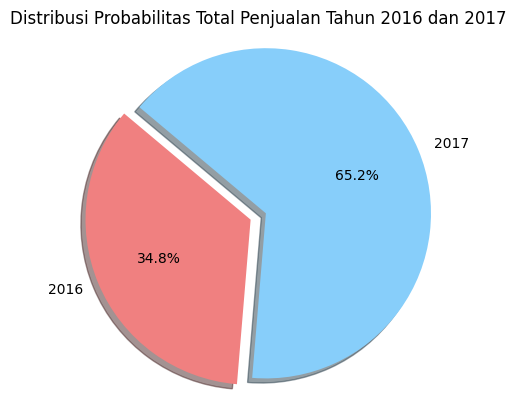

In [367]:
# Konversi kolom "SALE DATE" ke tipe data datetime
data_df["SALE DATE"] = pd.to_datetime(data_df["SALE DATE"], errors="coerce")

# Filter data untuk tahun 2016 dan 2017
data_2016 = data_df[data_df["SALE DATE"].dt.year == 2016]
data_2017 = data_df[data_df["SALE DATE"].dt.year == 2017]

# Hitung total penjualan dari tahun 2016 dan 2017
total_penjualan_2016 = len(data_2016)
total_penjualan_2017 = len(data_2017)

# Hitung probabilitas distribusi total penjualan
probabilitas_2016 = total_penjualan_2016 / (total_penjualan_2016 + total_penjualan_2017)
probabilitas_2017 = total_penjualan_2017 / (total_penjualan_2016 + total_penjualan_2017)

# Visualisasikan distribusi probabilitas
labels = ["2016", "2017"]
sizes = [probabilitas_2016, probabilitas_2017]
colors = ["lightcoral", "lightskyblue"]
explode = (0.1, 0)  # Pecahkan potongan pertama (2016)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Distribusi Probabilitas Total Penjualan Tahun 2016 dan 2017")
plt.show()

SUM: Probabilitas distribusi penjualan properti tahun 2016 sebesar 34.8% dan tahun 2017 sebesar 65.2% mengindikasikan sebaran relatif penjualan properti antara kedua tahun tersebut. Proporsi yang lebih tinggi untuk tahun 2017 menggambarkan peningkatan signifikan dalam penjualan properti pada tahun tersebut dibandingkan dengan tahun sebelumnya.

### CONVIDENCE INTERVAL
#### Berapa nilai Interval kepercayaan 95% (z =1.96) untuk rata rata harga penjualan?


In [368]:
# Menghitung rata-rata harga penjualan properti
mean_harga = data_df["SALE PRICE"].mean()

# Menghitung deviasi standar harga penjualan properti
sd = data_df["SALE PRICE"].std()

# Menentukan jumlah sampel (n)
n = len(data_df)

# Menghitung margin of error
z = 1.96  # Nilai z untuk interval kepercayaan 95%
se = z * (sd / np.sqrt(n))

# Menghitung batas atas dan batas bawah interval kepercayaan
batas_atas = rata_rata_harga + se
batas_bawah = rata_rata_harga - se

print("Interval kepercayaan 95% untuk rata-rata harga penjualan properti:")
print(f"Batas Atas: {batas_atas}")
print(f"Batas Bawah: {batas_bawah}")

Interval kepercayaan 95% untuk rata-rata harga penjualan properti:
Batas Atas: 1351725.967441118
Batas Bawah: 1181714.114360538


SUM: Tingkat kepercayaan 95%, berarti kita yakin bahwa rata-rata harga penjualan properti akan jatuh di antara batas atas (1,351,725.97) dan batas bawah (1,181,714.11). Interval ini memberikan kita perkiraan kisaran yang cukup luas di mana rata-rata sebenarnya berada, dan kita memiliki 95% kepercayaan bahwa rata-rata tersebut berada dalam interval ini. Dengan kata lain, kita memiliki keyakinan bahwa rata-rata harga penjualan properti berada di antara dua angka tersebut.

### HIPOTESIS TESTING
#### Apakah mean harga penjualan properti antara Manhattan dan Bronx sama?


Hipotesis Null (H0): Rata-rata harga penjualan properti di Manhattan sama dengan rata-rata harga penjualan properti di Bronx.
H0: μ_Manhattan = μ_Bronx

Hipotesis Alternatif (H1): Rata-rata harga penjualan properti di Manhattan tidak sama dengan rata-rata harga penjualan properti di Bronx.
H1: μ_Manhattan ≠ μ_Bronx

Tingkat signifikansi (α), misalnya, α = 0.05



In [369]:


# Mengambil sampel data untuk Manhattan dan Bronx
sample_manhattan = data_df[data_df["BOROUGH"] == "Manhattan"]["SALE PRICE"]
sample_bronx = data_df[data_df["BOROUGH"] == "Bronx"]["SALE PRICE"]

# Menghitung rata-rata dan deviasi standar
mean_manhattan = sample_manhattan.mean()
std_manhattan = sample_manhattan.std()
n_manhattan = len(sample_manhattan)

mean_bronx = sample_bronx.mean()
std_bronx = sample_bronx.std()
n_bronx = len(sample_bronx)

# Menghitung statistik uji t
t_statistic, p_value = stats.ttest_ind(sample_manhattan, sample_bronx)

# Menampilkan hasil statistika perhitungan
print("Rata-rata Manhattan:", mean_manhattan)
print("Rata-rata Bronx:", mean_bronx)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Tentukan tingkat signifikansi (α)
alpha = 0.05

# Tentukan derajat kebebasan (df) untuk uji t, yang dapat dihitung dengan rumus dF
df = n_manhattan + n_bronx - 2

# Tentukan nilai kritis atau ambang (critical value) dari distribusi t dengan df dan tingkat signifikansi α
t_critical = stats.t.ppf(1 - alpha / 2, df)

# Bandingkan t-score dengan nilai kritis. Jika t-score lebih besar dari nilai kritis atau berada di luar interval kritis, maka kita dapat menolak hipotesis null. Jika t-score lebih kecil dari nilai kritis, kita gagal untuk menolak hipotesis null.
if abs(t_statistic) > t_critical:
    print("Menolak hipotesis null: Terdapat perbedaan signifikan antara Manhattan dan Bronx.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis null.")

# Bandingkan p-value dengan tingkat signifikansi
if p_value < alpha:
    print("P-Value < α: Menolak hipotesis null.")
else:
    print("P-Value >= α: Tidak cukup bukti untuk menolak hipotesis null.")

Rata-rata Manhattan: 3308202.0995427365
Rata-rata Bronx: 590193.6434955313
T-Statistic: 9.400997033054054
P-Value: 5.9354644597074e-21
Menolak hipotesis null: Terdapat perbedaan signifikan antara Manhattan dan Bronx.
P-Value < α: Menolak hipotesis null.


SUM: Berdasarkan hasil ini, kita dapat menarik kesimpulan bahwa terdapat perbedaan signifikan antara rata-rata harga penjualan properti di Manhattan dan Bronx. Dengan nilai P-Value yang sangat kecil (kurang dari tingkat signifikansi α = 0.05), kita menolak hipotesis null. Hipotesis null dalam konteks ini adalah bahwa tidak ada perbedaan signifikan antara rata-rata harga penjualan properti di Manhattan dan Bronx. Dengan kata lain, hasil ini memberikan bukti yang kuat bahwa rata-rata harga penjualan properti di Manhattan secara statistik lebih tinggi daripada di Bronx. 